# ```USA Accident EDA```

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
# matplotlib uses numpy f(x) for numerical  data and mulit-d arrays.
# so numpy is a reuired dependency for mpl
# import numpy

In [12]:
## load the data
data = pd.read_csv("F:\Programming\ML training\eda\Eartquakes-1990-2023.csv")
print(data)

               ssstime                                     place     status  \
0         631153353990         12 km NNW of Meadow Lakes, Alaska   reviewed   
1         631153491210                14 km S of Volcano, Hawaii   reviewed   
2         631154083450                7 km W of Cobb, California   reviewed   
3         631155512130      11 km E of Mammoth Lakes, California   reviewed   
4         631155824490                    16km N of Fillmore, CA   reviewed   
...                ...                                       ...        ...   
3445247  1690626851941                5 km NW of Chikusei, Japan   reviewed   
3445248  1690626975715              Kodiak Island region, Alaska  automatic   
3445249  1690627215940  12 km W of Alberto Oviedo Mota, B.C., MX  automatic   
3445250  1690628146040                        7 km W of Cobb, CA  automatic   
3445251  1690628937884                 35 km W of Karluk, Alaska  automatic   

         tsunami  significance   data_type  magnitu

## `Dataset specifications`

In [13]:
data.columns
## headings of columns

Index(['ssstime', 'place', 'status', 'tsunami', 'significance', 'data_type',
       'magnitudo', 'state', 'longitude', 'latitude', 'depth', 'date'],
      dtype='object')

In [14]:
print("No. of rows : " , end="")
len(data)
print("statistical info about the dataset: " )
data.info()


No. of rows : statistical info about the dataset: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3445252 entries, 0 to 3445251
Data columns (total 12 columns):
 #   Column        Dtype  
---  ------        -----  
 0   ssstime       int64  
 1   place         object 
 2   status        object 
 3   tsunami       int64  
 4   significance  int64  
 5   data_type     object 
 6   magnitudo     float64
 7   state         object 
 8   longitude     float64
 9   latitude      float64
 10  depth         float64
 11  date          object 
dtypes: float64(4), int64(3), object(5)
memory usage: 315.4+ MB


In [15]:
data.date.astype("int32").dtypes
data.date

ValueError: invalid literal for int() with base 10: '1990-01-01 00:22:33.990000+00:00'

### `some statistical insights`

``` 
most tsunami prone regions: by countning the occurrences
avg time of earthquake : using mean method
most severe earthquake:  using max() on magnitudo etc.

``` another possible insight that can be drawn but idk how to do it is : the regions where earthquakes took place back to back or with a short period of break, info about that region can be retreived and check for works, construction, quarrying, minig or any such reasons that would have led to a minor cause of earthquake. Also it would help with post disaster management.```

``one more thing is , as we've data of latitude and longitude, we can use this geospatial data to visualise such as contour plots or heat maps``

In [ ]:
data.describe()

,ssstime,tsunami,significance,magnitudo,longitude,latitude,depth
count,3.445252e+06,3.445252e+06,3.445252e+06,3.445252e+06,3.445252e+06,3.445252e+06,3.445252e+06
mean,1.247212e+12,4.435089e-04,7.401168e+01,1.774094e+00,-1.012874e+02,3.746499e+01,2.285593e+01
std,2.975600e+11,2.105498e-02,1.016372e+02,1.291079e+00,7.697603e+01,2.041674e+01,5.485274e+01
min,6.311534e+11,0.000000e+00,0.000000e+00,-9.990000e+00,-1.799997e+02,-8.442200e+01,-1.000000e+01
25%,1.024528e+12,0.000000e+00,1.300000e+01,9.100000e-01,-1.464299e+02,3.406400e+01,3.120000e+00
50%,1.282414e+12,0.000000e+00,3.300000e+01,1.460000e+00,-1.189542e+02,3.793700e+01,7.700000e+00
75%,1.508742e+12,0.000000e+00,8.100000e+01,2.300000e+00,-1.159270e+02,4.785200e+01,1.612300e+01
max,1.690629e+12,1.000000e+00,2.910000e+03,9.100000e+00,1.800000e+02,8.738600e+01,7.358000e+02


In [ ]:
# find the numerical data 
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numerical_df =data.select_dtypes(include=object)
len(numerical_df.columns)
numerical_df


,place,status,data_type,state
0,"12 km NNW of Meadow Lakes, Alaska",reviewed,earthquake,Alaska
1,"14 km S of Volcano, Hawaii",reviewed,earthquake,Hawaii
2,"7 km W of Cobb, California",reviewed,earthquake,California
3,"11 km E of Mammoth Lakes, California",reviewed,earthquake,California
4,"16km N of Fillmore, CA",reviewed,earthquake,California
...,...,...,...,...
3445247,"5 km NW of Chikusei, Japan",reviewed,earthquake,Japan
3445248,"Kodiak Island region, Alaska",automatic,earthquake,Alaska
3445249,"12 km W of Alberto Oviedo Mota, B.C., MX",automatic,earthquake,B.C.
3445250,"7 km W of Cobb, CA",automatic,earthquake,California


In [ ]:
# find missing values
# data.isna()
# data.isna().sum().sort_values(ascending=False)

"""by default sort is ascending"""
missing_percent = data.isna().sum().sort_values(ascending=False)/len(data)
missing_percent
## wow this dataset doesn't have any null, missing values

ssstime         0.0
place           0.0
status          0.0
tsunami         0.0
significance    0.0
data_type       0.0
magnitudo       0.0
state           0.0
longitude       0.0
latitude        0.0
depth           0.0
date            0.0
dtype: float64

In [ ]:
data.date

0          1
1          1
2          1
3          1
4          1
          ..
3445247    7
3445248    7
3445249    7
3445250    7
3445251    7
Name: date, Length: 3445252, dtype: int64

In [ ]:
# missing_percent=[missing_percent!=0] or missing_percent !=0 it's the same thing
# missing_percent
## just another way to say that none of the data values are null

``` plots can be of different type```


 _an interesting one being mplot3d, scatter plot in 3d, 3d bar chart etc. are also there_

In [ ]:
## Here as the data doesn't have any missing values
## there's no use of plotting graphs

In [ ]:
## data.drop()

**Exploratory Data Analysis**

In [ ]:
data.columns

Index(['ssstime', 'place', 'status', 'tsunami', 'significance', 'data_type',
       'magnitudo', 'state', 'longitude', 'latitude', 'depth', 'date'],
      dtype='object')

```Features

time in millisecconds
place
status
tsunami (boolean value)
significance
data_type
magnitudo
state
longitude
latitude
depth
date

In [ ]:
data.significance
# '''2910 is max and 0 is min'''
# data.magnitudo

0           96
1           31
2           19
3           15
4          134
          ... 
3445247    326
3445248     44
3445249     90
3445250     16
3445251     12
Name: significance, Length: 3445252, dtype: int64

In [ ]:
data.magnitudo.min()

-9.99

In [ ]:
 print(data.latitude,data.longitude)
# data.longitude

0          61.730200
1          19.317667
2          38.821000
3          37.664333
4          34.546000
             ...    
3445247    36.350700
3445248    57.790100
3445249    32.233167
3445250    38.827499
3445251    57.564800
Name: latitude, Length: 3445252, dtype: float64 0         -149.669200
1         -155.212333
2         -122.806167
3         -118.846333
4         -118.934000
              ...    
3445247    139.940200
3445248   -153.729900
3445249   -115.296833
3445250   -122.800499
3445251   -155.051000
Name: longitude, Length: 3445252, dtype: float64


_using this to find the geo location, and applying some geographical theory and analysis...this could also be used in geology research...also analysing the geography we can also derive out the reason for that particualr earthquake if time is put in for that..._

In [ ]:
y = data.state.unique()

y[:500]

array([' Alaska', ' Hawaii', ' California', 'California', ' Washington',
       ' Greece', ' Italy', ' Albania', ' Utah', 'Fiji region', ' Japan',
       'south of the Fiji Islands', ' Saint Kitts and Nevis',
       ' Indonesia', 'Central California', ' Solomon Islands',
       ' Timor Leste', ' B.C.', ' Switzerland', ' New Caledonia',
       ' Colombia', ' Nevada', ' Wyoming', 'Philippine Islands region',
       'southern Mid-Atlantic Ridge', ' Papua New Guinea', ' Vanuatu',
       ' France', ' Spain', ' Austria', ' North Carolina', ' Guam',
       ' Chile', ' China', ' Montana', ' Philippines', ' Poland',
       ' Virginia', 'Utah', ' Russia', 'northwest of Australia',
       ' New Zealand', 'Northern California', ' Tonga', ' Idaho',
       ' Taiwan', 'Bosnia and Herzegovina region', ' Oregon',
       'southeast Indian Ridge', ' Slovenia', ' Iran', ' Afghanistan',
       'Owen Fracture Zone region', ' Canada', ' Peru', ' Missouri',
       ' Mexico', 'Mariana Islands region', ' German

In [ ]:
Earthquake_state = data.state.value_counts()
Earthquake_state[:100]


 California                  866398
 Alaska                      777858
California                   491588
 Nevada                      174065
 Hawaii                      125328
                              ...  
 Venezuela                     1472
Reykjanes Ridge                1433
 Algeria                       1408
east of the Kuril Islands      1398
Wyoming                        1385
Name: state, Length: 100, dtype: int64

## Quest
```
1. which state is most prone to earthquake in order of intensity?
2. are there any seasonal patterns in earthquake occurrence

In [ ]:
# if 'Alaska' in data.state:
# print("true") Or
"Hawaii" in data.state

   
## one error here, Hawaii is clearly there in states but it's printing false
# earthquakes in Indonesia haven't been recorded in this!
## but there were very bad earthquakes in indonesia too......

False

<Axes: >

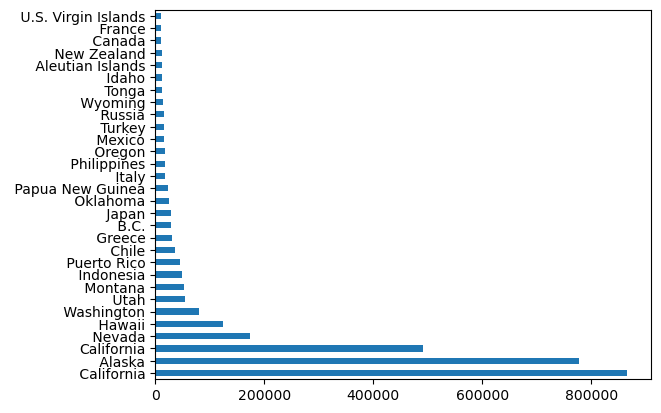

In [ ]:
Earthquake_state[:30].plot(kind="barh")

In [ ]:
# def f(x,y):
#      return (1 - y**5 + x**5)*np.exp(-x**2-y**2)

# x=data.ssstime[:50]
# y=data.magnitudo[:50]
# # z=data.significance[:50]
# X,Y = np.meshgrid(x,y)
# C=plt.contour(X,Y,f(x,y),8,colors="black")
# plt.contour(f(X<Y),8,cmap=plt.cm.hot)
# plt.clabel(C,inline=1,fontsize=10)
# plt.colorbar()

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")


<Axes: xlabel='state', ylabel='Count'>

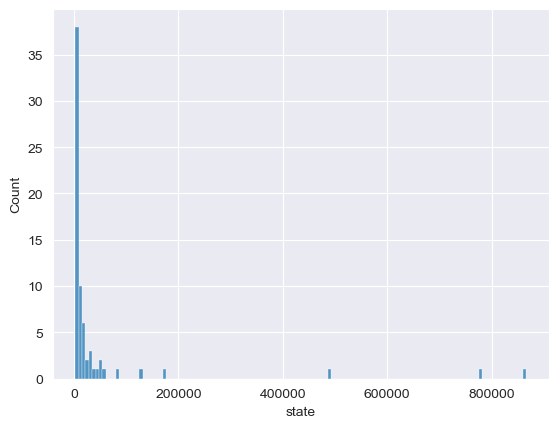

In [ ]:
type(y_[:20])
sns.histplot(Earthquake_state[:70])


<Axes: xlabel='ssstime', ylabel='Count'>

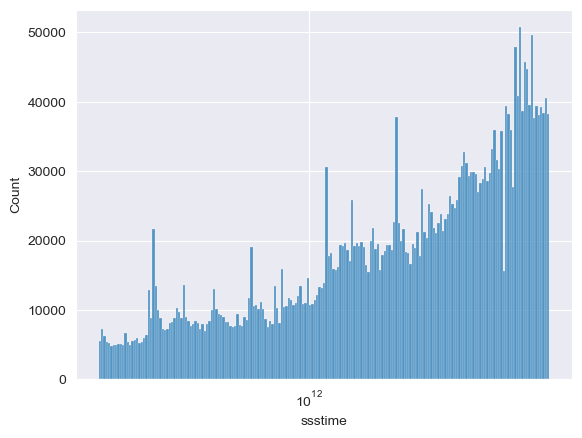

In [ ]:
sns.histplot(data=data, x=data.ssstime,log_scale=True)

``` log_scale helps in better visualization of  distribution.```

In [ ]:
highMagnitude_earthquakeProne_states = Earthquake_state[Earthquake_state>500]
lesserMagnitudeEarthquakeRegions = Earthquake_state[Earthquake_state<500]
len(highMagnitude_earthquakeProne_states)/len(Earthquake_state)

0.17482517482517482

<Axes: xlabel='state', ylabel='Count'>

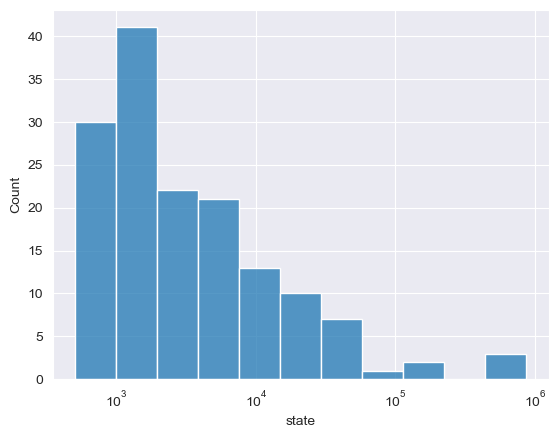

In [ ]:
sns.histplot(highMagnitude_earthquakeProne_states,log_scale=True)

In [ ]:
Earthquake_state[Earthquake_state>1000]
# Earthquake_state.unique().max()
# data.state.unique().max()
#states where only 1 earthquake was recorded

 California                   866398
 Alaska                       777858
California                    491588
 Nevada                       174065
 Hawaii                       125328
                               ...  
 Wallis and Futuna              1068
 India region                   1066
southern East Pacific Rise      1041
 Guadeloupe                     1040
 Iceland                        1022
Name: state, Length: 120, dtype: int64

<Axes: xlabel='state', ylabel='Count'>

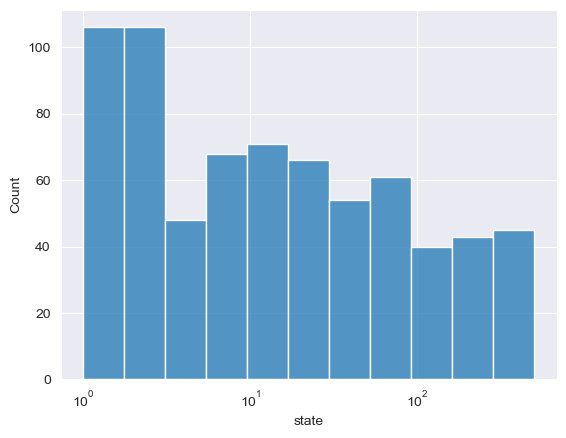

In [ ]:
sns.histplot(lesserMagnitudeEarthquakeRegions,log_scale=True)

```Some drawn insights```
```
 1. Maximum no. of earthquakes take place in California with 866398 Earthquakes! 
 2. More than 17% of the states are more prone to earthquakes than the rest of the states. 
3.  120 states have recorded over 1000 earthquakes.
4. states recording max no. of earthquakes are the most severe ones also, with max time as well..
5. counts of earthquake and time are related by a graph similar to e^x, with some points of  sudden changes

**are earthqaukes someway predictable according to some pattern if followed with climate or some particular period of the year causing earthquakes due to natural reasons or Induced Seismicity?**

In [ ]:
data.columns

Index(['ssstime', 'place', 'status', 'tsunami', 'significance', 'data_type',
       'magnitudo', 'state', 'longitude', 'latitude', 'depth', 'date'],
      dtype='object')

In [ ]:
# date Vs. earthquake frequency

In [ ]:
data.date[0]

'1990-01-01 00:22:33.990000+00:00'

_data.date is an object but it can be converted to int using regexp also but there's another method in built in pandas for typecasting_

In [ ]:
# import re
# strings = data.date
# pattern = r'\.\d+'

# data.dateTime = [re.sub(pattern, '', s) for s in strings]
# pattern = r'\+\d{2}:\d{2}$'

# strings = [re.sub(pattern, '', s) for s in strings]
# data['date'] = pd.to_datetime(data["date"],format="%Y-%m-%d %H:%M:%S").dt.month


# print(data.dtypes)


In [ ]:
data.date.astype("int32").dtypes
data[["date","state"]]
# data.date.max()

,date,state
0,1,Alaska
1,1,Hawaii
2,1,California
3,1,California
4,1,California
...,...,...
3445247,7,Japan
3445248,7,Alaska
3445249,7,B.C.
3445250,7,California


_data.date now returns month_

```so from this we can say that max earthquakes take place in dec```

In [ ]:
data.rename(columns={"date":"month"},inplace=True)
data.month
## so now the name has been changed

0          1
1          1
2          1
3          1
4          1
          ..
3445247    7
3445248    7
3445249    7
3445250    7
3445251    7
Name: month, Length: 3445252, dtype: int64

In [ ]:
print(data.date.value_counts().max())
#this output will give on which month max no. of earthquakes took place in the period of 1990-2023

306310


###### **California is most prone to earthquakes because it lies on the San Andreas Fault, which is the tectonic boundary between the Pacific and North American tectonic plates. The Pacific Plate is moving slowly to the northwest relative to the North American Plate, which underlies most of the Pacific Ocean, as well as all California west of the San Andreas fault.**

<Axes: xlabel='date', ylabel='Count'>

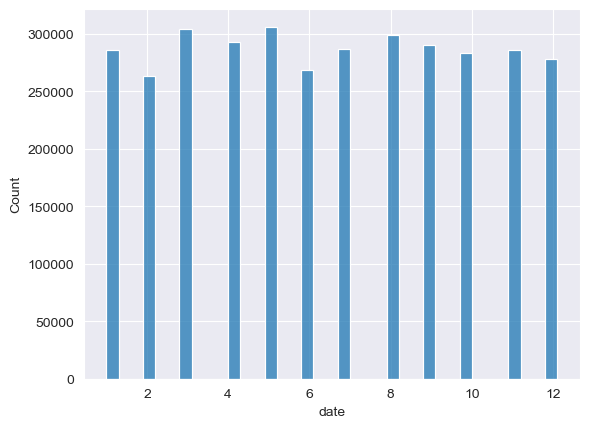

In [ ]:
sns.histplot(data.date,binwidth = 0.3)

In [ ]:
# extract the month in which max no. of earthquakes take place

```extract the months of all earthquake records and sort it in accordance with states . use this to cross check with what all activities have happened in that region in that particuar period which could have been a possible reason for earthquake, like nuckear tests, fluid injection and disposal, geothermal energy extraction.```

In [ ]:
## based on the yr. recording max. earthquakes, activities of that year can be analysed as this stats would gather attention for geological research and analysis as well ...

###### California is most prone to earthquakes because it lies on the San Andreas Fault, which is the tectonic boundary between the Pacific and North American tectonic plates. The Pacific Plate is moving slowly to the northwest relative to the North American Plate, which underlies most of the Pacific Ocean, as well as all California west of the San Andreas fault.

In [ ]:
 data.ssstime.value_counts().plot(kind="pie")

NameError: name 'data' is not defined

In [ ]:
x=data.month
y=data.significance
plt.figure(figsize=(10,6))
plt.plot(x,y,marker="o",linstyle="-")
plt.title("Earthquake Significance/Impact Over Time")
plt.xlabel('Time')
plt.ylabel('Significance')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
smaller_part=data.sample(int(0.1*len(data)))
smaller_part.value_counts().plot(kind="pie")

In [17]:
%pip install mpl_toolkits

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement mpl_toolkits (from versions: none)
ERROR: No matching distribution found for mpl_toolkits


In [16]:
# %matplotlib inline
# from mpl_toolkits.basemap import Basemap
# fig = plt.figure(figsize=(12,9))
# m = Basemap(projection = 'mill', llcrnrlat = -90, urcrnrlat = 90, llcrnrlon = -180, urcrnrlon = 180, resolution = 'c')
# m.drawcoastlines()
# m.drawcountries(color='gray')
# m.drawstates(color='gray')

# lat = data['latitude'].tolist()
# lon = data['longitude'].tolist()

# m.scatter(lon, lat, latlon = True, s = 10, c = 'red', marker = 'o', alpha = 1)

# plt.show()

In [ ]:
# pivot_data = data.pivot("ssstime","month","significance")
# plt.figure(figsize=(10, 6)) 
# sns.heatmap(pivot_data, annot=True, fmt="d", cmap="YlGnBu")
# plt.title("Impact / time / month")
# plt.xlabel("Impact")
# plt.ylabel("time")
# plt.tight_layout()
# plt.show()

# # here there's an error "Key Value Error" formonth, but i've changed the name from date to month but stil it shows error

C:\Users\HP\AppData\Local\Temp\ipykernel_21144\102421712.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  pivot_data = data.pivot("ssstime","month","significance")


KeyError: 'month'